<a href="https://colab.research.google.com/github/Shivam12-03/finance-project/blob/main/site/en/guide/variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Introduction to Variables

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/variable"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/guide/variable.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/guide/variable.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/variable.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

A TensorFlow **variable** is the recommended way to represent shared, persistent state your program manipulates. This guide covers how to create, update, and manage instances of `tf.Variable` in TensorFlow.

Variables are created and tracked via the `tf.Variable` class. A `tf.Variable` represents a tensor whose value can be changed by running ops on it.  Specific ops allow you to read and modify the values of this tensor. Higher level libraries like `tf.keras` use `tf.Variable` to store model parameters.

## Setup

This notebook discusses variable placement.  If you want to see on what device your variables are placed, uncomment this line.

In [ ]:
import tensorflow as tf

# Uncomment to see where your variables get placed (see below)
# tf.debugging.set_log_device_placement(True)

## Create a variable

To create a variable, provide an initial value.  The `tf.Variable` will have the same `dtype` as the initialization value.

In [ ]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

A variable looks and acts like a tensor, and, in fact, is a data structure backed by a `tf.Tensor`.  Like tensors, they have a `dtype` and a shape, and can be exported to NumPy.

In [ ]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Most tensor operations work on variables as expected, although variables cannot be reshaped.

As noted above, variables are backed by tensors. You can reassign the tensor using `tf.Variable.assign`.  Calling `assign` does not (usually) allocate a new tensor; instead, the existing tensor's memory is reused.

If you use a variable like a tensor in operations, you will usually operate on the backing tensor.  

Creating new variables from existing variables duplicates the backing tensors. Two variables will not share the same memory.

## Lifecycles, naming, and watching

In Python-based TensorFlow, `tf.Variable` instance have the same lifecycle as other Python objects. When there are no references to a variable it is automatically deallocated.

Variables can also be named which can help you track and debug them.  You can give two variables the same name.

Variable names are preserved when saving and loading models. By default, variables in models will acquire unique variable names automatically, so you don't need to assign them yourself unless you want to.

Although variables are important for differentiation, some variables will not need to be differentiated.  You can turn off gradients for a variable by setting `trainable` to false at creation. An example of a variable that would not need gradients is a training step counter.

## Placing variables and tensors

For better performance, TensorFlow will attempt to place tensors and variables on the fastest device compatible with its `dtype`.  This means most variables are placed on a GPU if one is available.

However, you can override this.  In this snippet, place a float tensor and a variable on the CPU, even if a GPU is available.  By turning on device placement logging (see [Setup](#scrollTo=xZoJJ4vdvTrD)), you can see where the variable is placed.

Note: Although manual placement works, using [distribution strategies](distributed_training.ipynb) can be a more convenient and scalable way to optimize your computation.

If you run this notebook on different backends with and without a GPU you will see different logging.  *Note that logging device placement must be turned on at the start of the session.*

It's possible to set the location of a variable or tensor on one device and do the computation on another device.  This will introduce delay, as data needs to be copied between the devices.

You might do this, however, if you had multiple GPU workers but only want one copy of the variables.

Note: Because `tf.config.set_soft_device_placement` is turned on by default, even if you run this code on a device without a GPU, it will still run.  The multiplication step will happen on the CPU.

For more on distributed training, refer to the [guide](distributed_training.ipynb).

## Next steps

To understand how variables are typically used, see our guide on [automatic differentiation](autodiff.ipynb).

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


            HINDUNILVR.NS  NESTLEIND.NS      ITC.NS  BRITANNIA.NS    DABUR.NS
Date                                                                         
2020-02-04    1991.789429   1562.588745  176.386490   2925.760498  481.494202
2020-02-05    1996.132080   1555.870361  177.040848   2946.985352  488.955597
2020-02-06    1992.528442   1546.384155  174.668869   2943.591064  487.520599
2020-02-07    1995.808716   1550.453125  174.546173   2942.867188  491.346985
2020-02-10    1995.208496   1535.677734  172.215103   2856.157715  490.581665
...                   ...           ...         ...           ...         ...
2025-01-28    2388.850098   2156.300049  435.450012   5060.750000  525.349976
2025-01-29    2383.949951   2180.699951  433.350006   5037.049805  518.099976
2025-01-30    2408.750000   2217.350098  436.200012   5075.350098  533.700012
2025-01-31    2468.800049   2313.199951  447.500000   5129.649902  529.849976
2025-02-01    2506.050049   2327.199951  462.549988   5201.35009

<Figure size 1200x600 with 0 Axes>

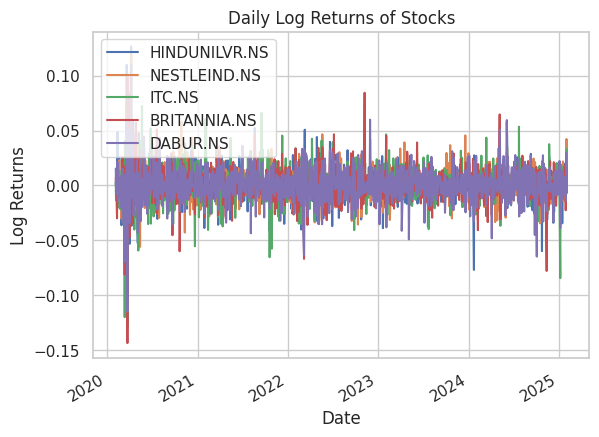

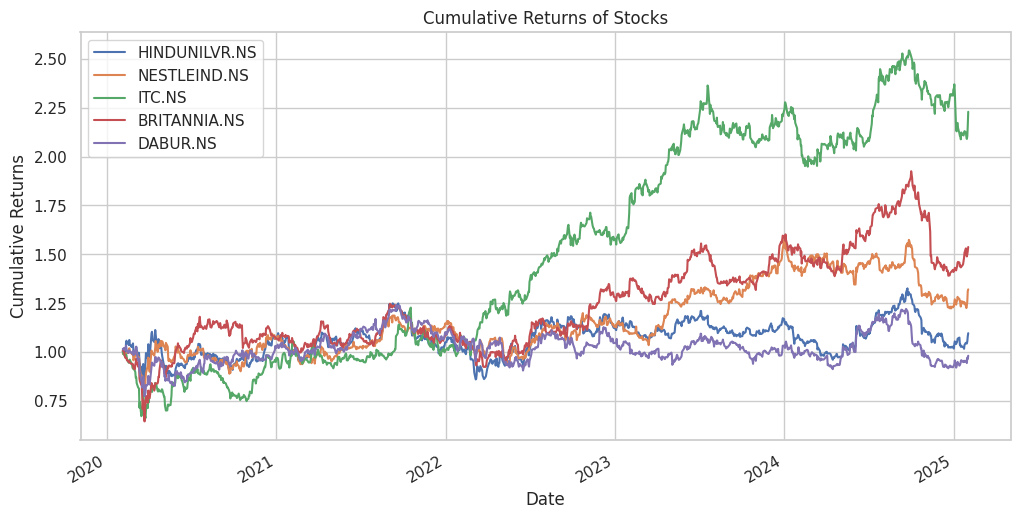

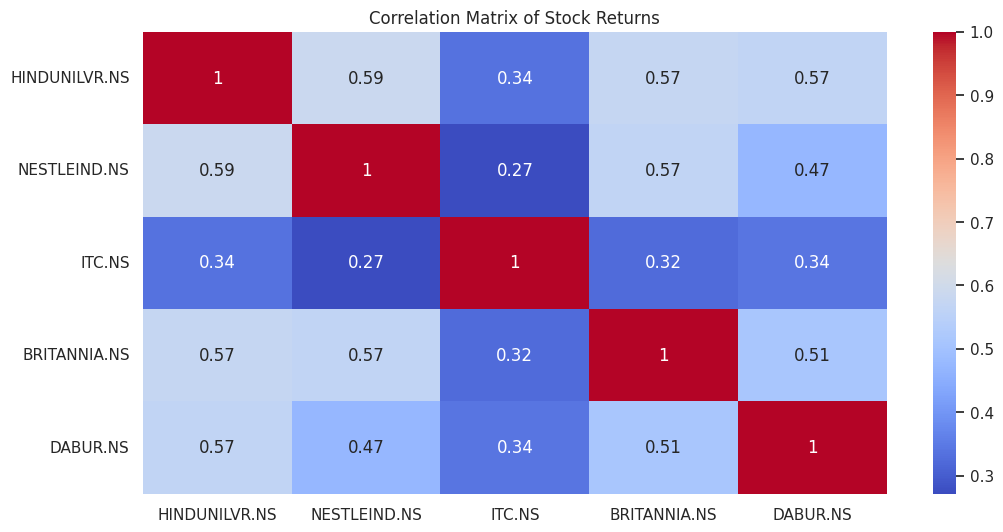

               Expected Return  Volatility (Risk)  Sharpe Ratio
HINDUNILVR.NS         0.046789           0.237617      0.112740
NESTLEIND.NS          0.081146           0.221844      0.275624
ITC.NS                0.196401           0.256246      0.688403
BRITANNIA.NS          0.117212           0.242830      0.400331
DABUR.NS              0.023022           0.231686      0.013042


<ipython-input-16-66b06b90bdf2>:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_metrics.index, y=stock_metrics["Expected Return"], palette="Blues_r")


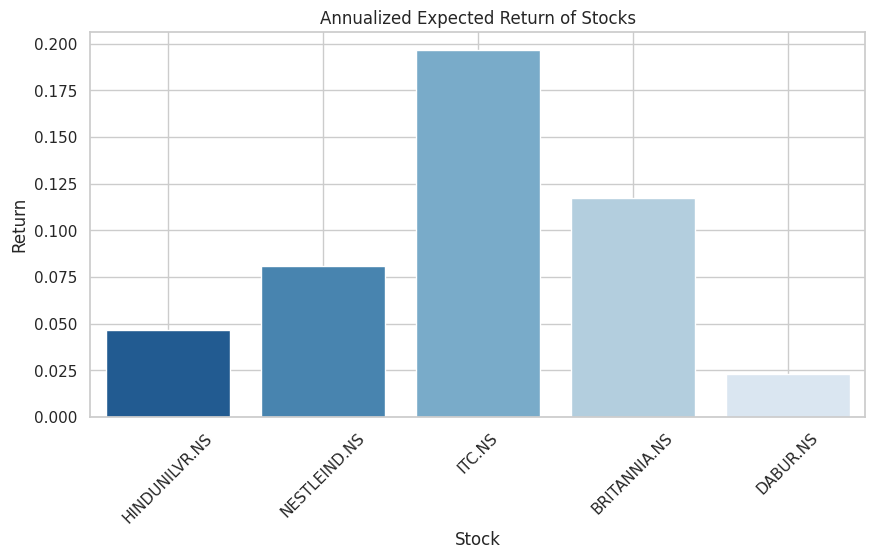

<ipython-input-16-66b06b90bdf2>:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_metrics.index, y=stock_metrics["Volatility (Risk)"], palette="Reds_r")


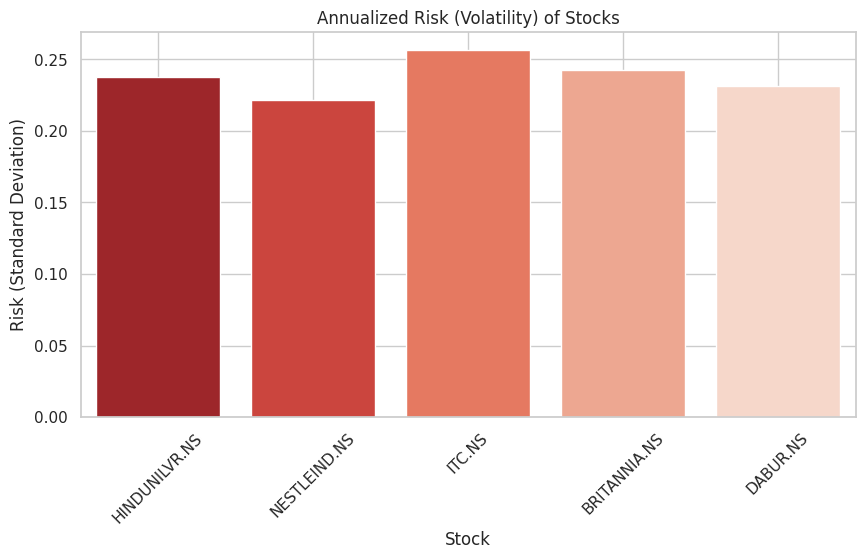

<ipython-input-16-66b06b90bdf2>:152: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(stock_metrics["Volatility (Risk)"][i], stock_metrics["Expected Return"][i], ticker, fontsize=12)


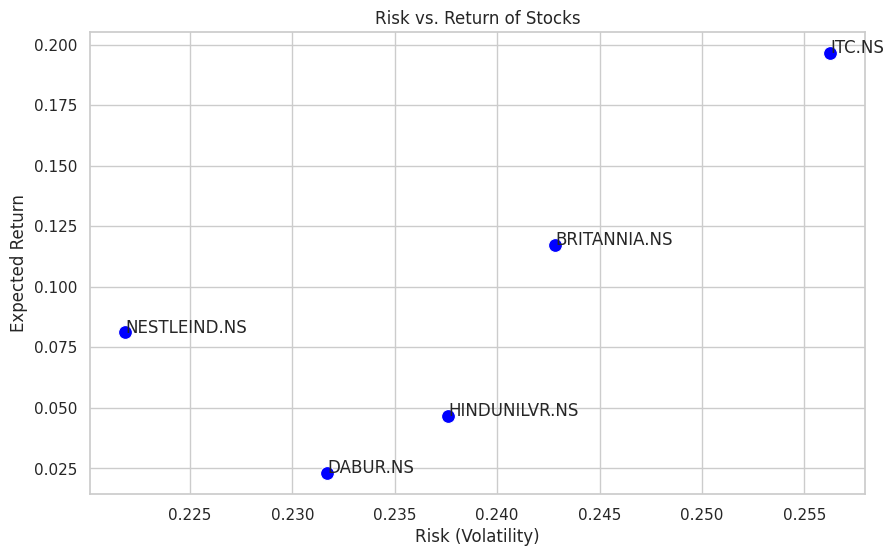

<ipython-input-16-66b06b90bdf2>:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stock_metrics.index, y=stock_metrics["Sharpe Ratio"], palette="Greens_r")


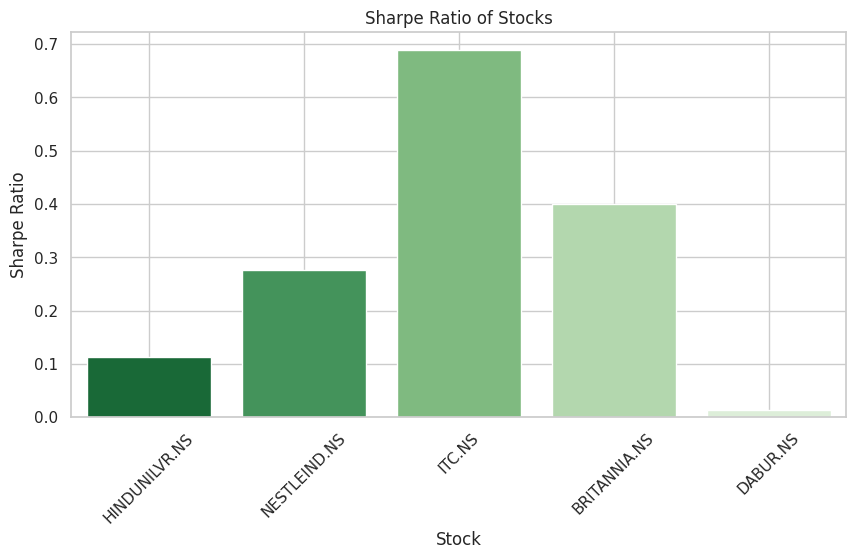

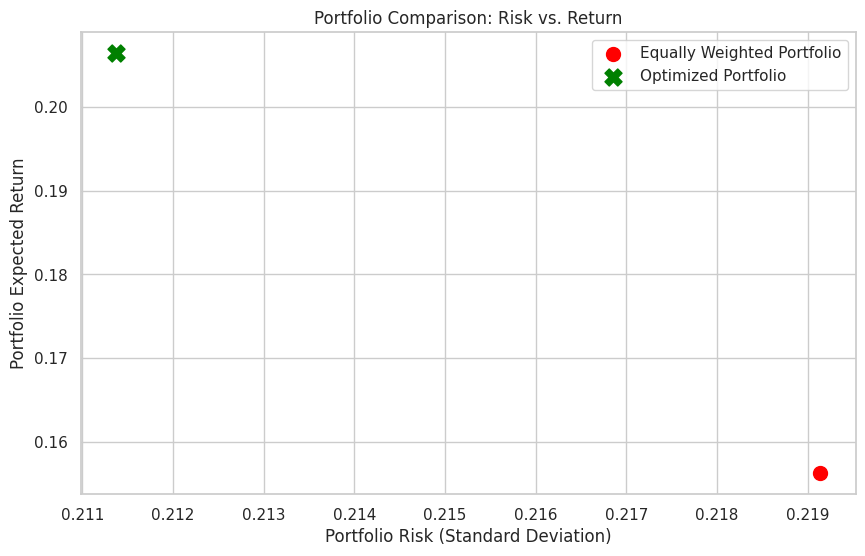

In [16]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

# Define stock tickers
tickers = ['HINDUNILVR.NS', 'NESTLEIND.NS', 'ITC.NS', 'BRITANNIA.NS', 'DABUR.NS']


# Define time period
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Download historical stock data
adj_close_df = pd.DataFrame()
for ticker in tickers:
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        adj_close_df[ticker] = data['Close']  # Use 'Close' instead of 'Adj Close'
    except Exception as e:
        print(f"Error downloading data for {ticker}: {e}")
print(adj_close_df)
# Calculate log returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1)).dropna()
print(log_returns)

# Compute covariance matrix
cov_matrix = log_returns.cov() * 252
print(cov_matrix)

# Define function for portfolio standard deviation
def standard_deviation(weights, cov_matrix):
    return np.sqrt(weights.T @ cov_matrix @ weights)

# Define function for expected portfolio return
def expected_return(weights, log_returns):
    return np.sum(log_returns.mean() * weights) * 252  # Changed 256 to 252

# Define Sharpe ratio
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    exp_ret = expected_return(weights, log_returns)
    std_dev = standard_deviation(weights, cov_matrix)
    return (exp_ret - risk_free_rate) / std_dev

# Negative Sharpe ratio (for minimization)
def negative_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

# Number of assets
num_assets = len(tickers)

# Initial equal weights
initial_weights = np.array([1/num_assets] * num_assets)

# Define constraints (weights must sum to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define bounds for weights (each between 0 and 1)
bounds = [(0, 1) for _ in range(num_assets)]

# Risk-free rate assumption
risk_free_rate = 0.02

# Perform optimization to maximize Sharpe ratio
result = minimize(
    negative_sharpe_ratio,
    initial_weights,
    args=(log_returns, cov_matrix, risk_free_rate),
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)

# Get optimal weights
optimal_weights = result.x

# Print results
print("Optimal Portfolio Weights:", optimal_weights)
print("Expected Return:", expected_return(optimal_weights, log_returns))
print("Standard Deviation:", standard_deviation(optimal_weights, cov_matrix))
print("Sharpe Ratio:", sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate))

# Plot log returns
plt.figure(figsize=(12, 6))
log_returns.plot()
plt.title('Daily Log Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Plot cumulative returns
(1 + log_returns).cumprod().plot(figsize=(12, 6))
plt.title('Cumulative Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(log_returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Stock Returns')
plt.show()
# Compute annualized metrics for each stock
annual_returns = log_returns.mean() * 252
annual_volatility = log_returns.std() * np.sqrt(252)
risk_free_rate = 0.02
sharpe_ratios = (annual_returns - risk_free_rate) / annual_volatility

# Convert results to DataFrame for easy plotting
stock_metrics = pd.DataFrame({
    "Expected Return": annual_returns,
    "Volatility (Risk)": annual_volatility,
    "Sharpe Ratio": sharpe_ratios
})

print(stock_metrics)

# Set style
sns.set(style="whitegrid")

# Bar Plot for Expected Returns
plt.figure(figsize=(10, 5))
sns.barplot(x=stock_metrics.index, y=stock_metrics["Expected Return"], palette="Blues_r")
plt.title("Annualized Expected Return of Stocks")
plt.ylabel("Return")
plt.xlabel("Stock")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar Plot for Volatility
plt.figure(figsize=(10, 5))
sns.barplot(x=stock_metrics.index, y=stock_metrics["Volatility (Risk)"], palette="Reds_r")
plt.title("Annualized Risk (Volatility) of Stocks")
plt.ylabel("Risk (Standard Deviation)")
plt.xlabel("Stock")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Scatter Plot for Risk vs. Return
plt.figure(figsize=(10, 6))
sns.scatterplot(x=stock_metrics["Volatility (Risk)"], y=stock_metrics["Expected Return"], s=100, color="blue")
for i, ticker in enumerate(stock_metrics.index):
    plt.text(stock_metrics["Volatility (Risk)"][i], stock_metrics["Expected Return"][i], ticker, fontsize=12)
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Return")
plt.title("Risk vs. Return of Stocks")
plt.grid(True)
plt.show()

# Bar Plot for Sharpe Ratios
plt.figure(figsize=(10, 5))
sns.barplot(x=stock_metrics.index, y=stock_metrics["Sharpe Ratio"], palette="Greens_r")
plt.title("Sharpe Ratio of Stocks")
plt.ylabel("Sharpe Ratio")
plt.xlabel("Stock")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Plot portfolio comparison
plt.figure(figsize=(10, 6))
plt.scatter(equal_risk, equal_return, color='red', marker='o', s=100, label="Equally Weighted Portfolio")
plt.scatter(optimal_risk, optimal_return, color='green', marker='X', s=150, label="Optimized Portfolio")

plt.xlabel("Portfolio Risk (Standard Deviation)")
plt.ylabel("Portfolio Expected Return")
plt.title("Portfolio Comparison: Risk vs. Return")
plt.legend()
plt.grid(True)
plt.show()
